In [ ]:
#Package installs
#!pip install pandas_datareader

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
import pandas_datareader.data as web #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import datetime #System clock

#Getting the most up to date data we can
today = datetime.today() #This function automatically updates with today's data

#Defining the equities we're interested in 
#tickers = ["MP","CLNE","RGLD","POLY.LON","FCX","OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT","SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT","BRY","KOS","FNV","FR.TRT","EDR.TRT","WPM"]
tickers = ["MP","CLNE","RGLD","POLY.LON","FCX"]

#Collecting data (in 5 ticker chunks)
equity_data_1 = pd.DataFrame(columns=tickers)

for ticks in tickers:
    equity_data_1[ticks] = web.DataReader(ticks,'av-daily',start=datetime(2018,1,1),end=today,api_key='ATE7ET9PU2KA685Y')['close']
                                                                                                                         
def tick(s):
    return equity_data_1[s].to_frame

#Checking the 20 most recent values
equity_data_1.tail(10)

,MP,CLNE,RGLD,POLY.LON,FCX
2022-09-20,31.85,6.07,92.64,227.0,29.72
2022-09-21,31.68,5.94,92.38,226.0,28.10
2022-09-22,30.55,5.74,91.88,200.0,28.35
2022-09-23,28.89,5.33,88.20,194.0,26.68
2022-09-26,27.97,5.05,86.46,199.5,26.50
2022-09-27,27.81,5.38,86.66,201.0,26.87
2022-09-28,28.78,5.68,92.84,200.0,27.86
2022-09-29,27.02,5.39,92.92,195.0,28.17
2022-09-30,27.30,5.34,93.82,195.0,27.33
2022-10-03,28.92,5.87,96.46,195.0,29.34


In [3]:
#Additional data pull 1

#Defining the equities we're interested in 
#tickers = ["MP","CLNE","RGLD","POLY.LON","FCX","OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT","SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT","BRY","KOS","FNV","FR.TRT","EDR.TRT","WPM"]
tickers = ["OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT"]

#Collecting data (in 5 ticker chunks)
equity_data_2 = pd.DataFrame(columns=tickers)

for ticks in tickers:
    equity_data_2[ticks] = web.DataReader(ticks,'av-daily',start=datetime(2018,1,1),end=today,api_key='ATE7ET9PU2KA685Y')['close']
                                                                                                                         
def tick(s):
    return equity_data_2[s].to_frame

In [13]:
#Additional data pull 2

#Defining the equities we're interested in 
#tickers = ["MP","CLNE","RGLD","POLY.LON","FCX","OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT","SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT","BRY","KOS","FNV","FR.TRT","EDR.TRT","WPM"]
tickers = ["SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT"]

#Collecting data (in 5 ticker chunks)
equity_data_3 = pd.DataFrame(columns=tickers)

for ticks in tickers:
    equity_data_3[ticks] = web.DataReader(ticks,'av-daily',start=datetime(2018,1,1),end=today,api_key='ATE7ET9PU2KA685Y')['close']
                                                                                                                         
def tick(s):
    return equity_data_3[s].to_frame

In [5]:
#Additional data pull 3

#Defining the equities we're interested in 
#tickers = ["MP","CLNE","RGLD","POLY.LON","FCX","OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT","SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT","BRY","KOS","FNV","FR.TRT","EDR.TRT","WPM"]
tickers = ["BRY","KOS","FNV","FR.TRT","EDR.TRT"]

#Collecting data (in 5 ticker chunks)
equity_data_4 = pd.DataFrame(columns=tickers)

for ticks in tickers:
    equity_data_4[ticks] = web.DataReader(ticks,'av-daily',start=datetime(2018,1,1),end=today,api_key='ATE7ET9PU2KA685Y')['close']
                                                                                                                         
def tick(s):
    return equity_data_4[s].to_frame

In [8]:
#Additional data pull 4

#Defining the equities we're interested in 
#tickers = ["MP","CLNE","RGLD","POLY.LON","FCX","OXY","NXE","ISO.TRV","ADT1.LON","OSK.TRT","SSRM","MGMLF","BRC.TRV","SIL.TRT","CCO.TRT","BRY","KOS","FNV","FR.TRT","EDR.TRT","WPM"]
tickers = ["WPM"]

#Collecting data (in 5 ticker chunks)
equity_data_5 = pd.DataFrame(columns=tickers)

for ticks in tickers:
    equity_data_5[ticks] = web.DataReader(ticks,'av-daily',start=datetime(2018,1,1),end=today,api_key='ATE7ET9PU2KA685Y')['close']
                                                                                                                         
def tick(s):
    return equity_data_5[s].to_frame

In [14]:
#greating unified data frame
equity_data = pd.concat([equity_data_1,equity_data_2,equity_data_3,equity_data_4,equity_data_5], axis=1, join="inner")

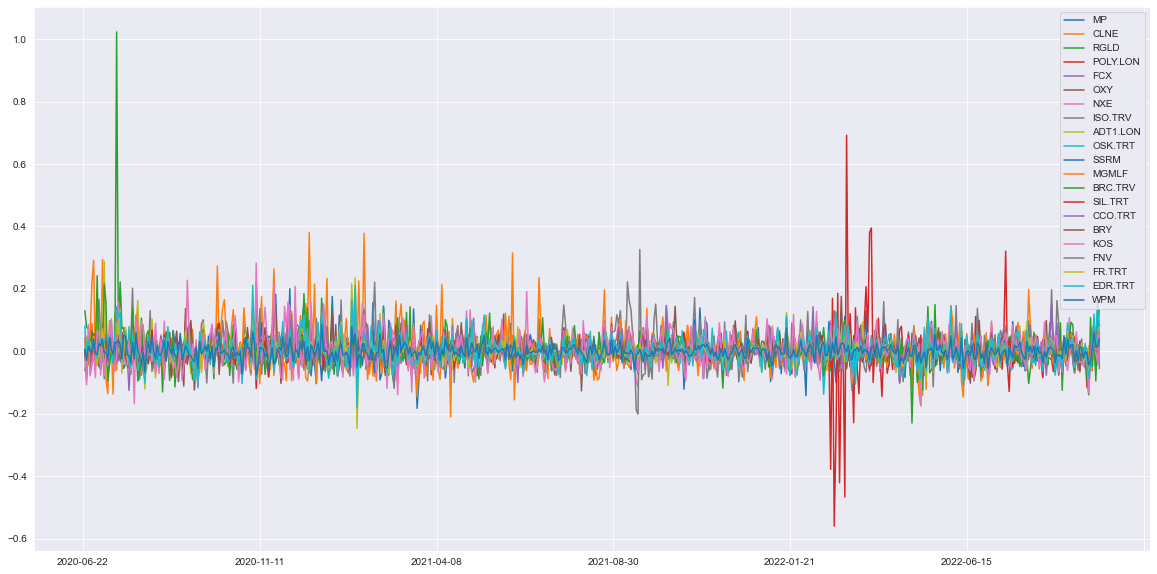

In [15]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
data_pct_change = equity_data.pct_change() #calculating the percent change of the equity over the period
data_pct_change.plot(grid=True, figsize=(20, 10));

In [16]:
#Calculating returns
returns = np.log(equity_data/equity_data.shift(1))

#Calculating average return over a year's worth of trading days
returns.mean()*253

#Calculating covariance over a years's worth of trading days
returns.cov()*253

,MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,...,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM
MP,0.551575,0.251850,0.032840,0.037352,0.157087,0.117526,0.189816,0.162408,0.041562,0.065747,...,0.050517,0.114515,0.089397,0.138444,0.146616,0.191698,0.037523,0.110302,0.140205,0.042373
CLNE,0.251850,0.809011,0.036217,-0.024295,0.158838,0.204261,0.209909,0.205549,0.057096,0.093771,...,0.119783,0.076058,0.101266,0.145234,0.197580,0.310405,0.038019,0.115860,0.122410,0.049090
RGLD,0.032840,0.036217,0.083412,0.022665,0.054037,0.034749,0.063018,0.061437,0.023340,0.086683,...,0.077503,0.086337,0.113636,0.039112,0.034523,0.046906,0.064213,0.115846,0.136571,0.085007
POLY.LON,0.037352,-0.024295,0.022665,1.321526,0.020452,-0.044804,-0.002038,-0.042586,0.037797,0.029197,...,0.017422,0.082247,0.046125,-0.032758,-0.031353,-0.062269,0.023327,0.033920,0.034825,0.041757
FCX,0.157087,0.158838,0.054037,0.020452,0.257559,0.148297,0.177199,0.154438,0.046138,0.097014,...,0.117580,0.099283,0.118509,0.118425,0.148362,0.205925,0.054207,0.134262,0.156563,0.078531
OXY,0.117526,0.204261,0.034749,-0.044804,0.148297,0.382573,0.135894,0.176526,0.012970,0.059356,...,0.082420,0.043974,0.064209,0.105379,0.250659,0.406179,0.033749,0.074895,0.086635,0.033308
NXE,0.189816,0.209909,0.063018,-0.002038,0.177199,0.135894,0.500324,0.377989,0.033860,0.113109,...,0.134303,0.159536,0.147821,0.290857,0.144476,0.230555,0.065652,0.175865,0.210713,0.092615
ISO.TRV,0.162408,0.205549,0.061437,-0.042586,0.154438,0.176526,0.377989,0.952085,0.011486,0.106150,...,0.119356,0.148388,0.152542,0.273265,0.152206,0.257901,0.067773,0.159801,0.207548,0.095014
ADT1.LON,0.041562,0.057096,0.023340,0.037797,0.046138,0.012970,0.033860,0.011486,0.263253,0.032701,...,0.073481,0.124223,0.063496,0.016507,0.018022,0.033632,0.026459,0.078014,0.079589,0.039435
OSK.TRT,0.065747,0.093771,0.086683,0.029197,0.097014,0.059356,0.113109,0.106150,0.032701,0.277220,...,0.173118,0.170482,0.210432,0.069925,0.075258,0.081211,0.092542,0.202512,0.243095,0.132513


In [18]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (50000):
    weights = np.random.random(21)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

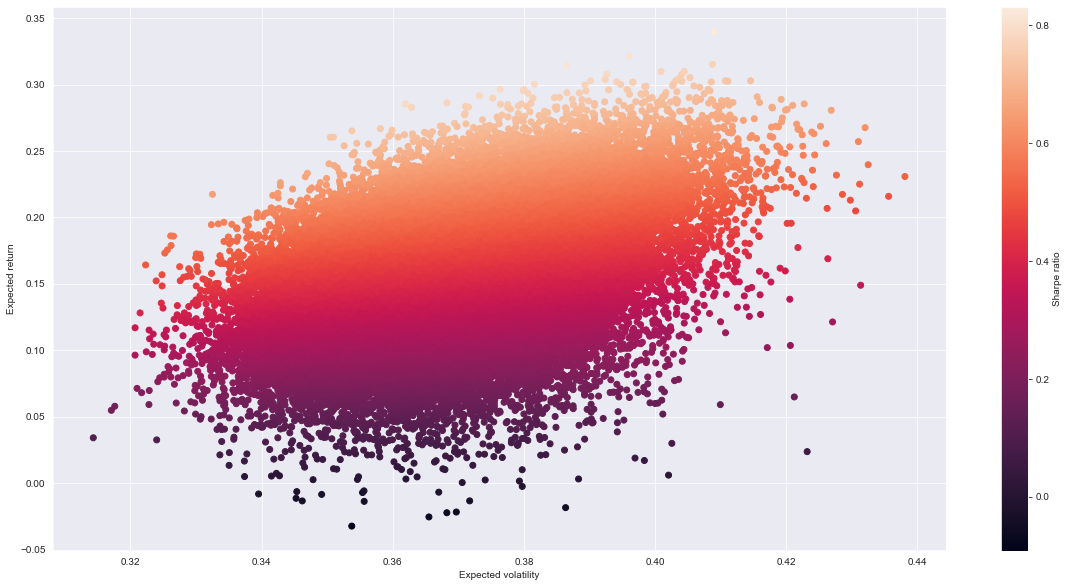

In [19]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

In [20]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])


In [22]:
#Creating a function to minimize the Sharpe ratio

size_portfolio = 21

def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)


In [23]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]')
print((opts_Sharpe['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))


OPTIMAL PORTFOLIO WEIGHTS FOR SHARPE RATIO [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]
[0.087 0.    0.    0.    0.203 0.247 0.    0.069 0.236 0.    0.    0.
 0.    0.    0.159 0.    0.    0.    0.    0.    0.   ]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.42253632 0.37040023 1.14075609]


In [24]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)


In [25]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]')
print((opts_variance['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]
[0.016 0.    0.343 0.033 0.    0.054 0.    0.    0.147 0.    0.    0.
 0.    0.    0.071 0.026 0.    0.311 0.    0.    0.   ]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.02793286 0.24321022 0.1148507 ]


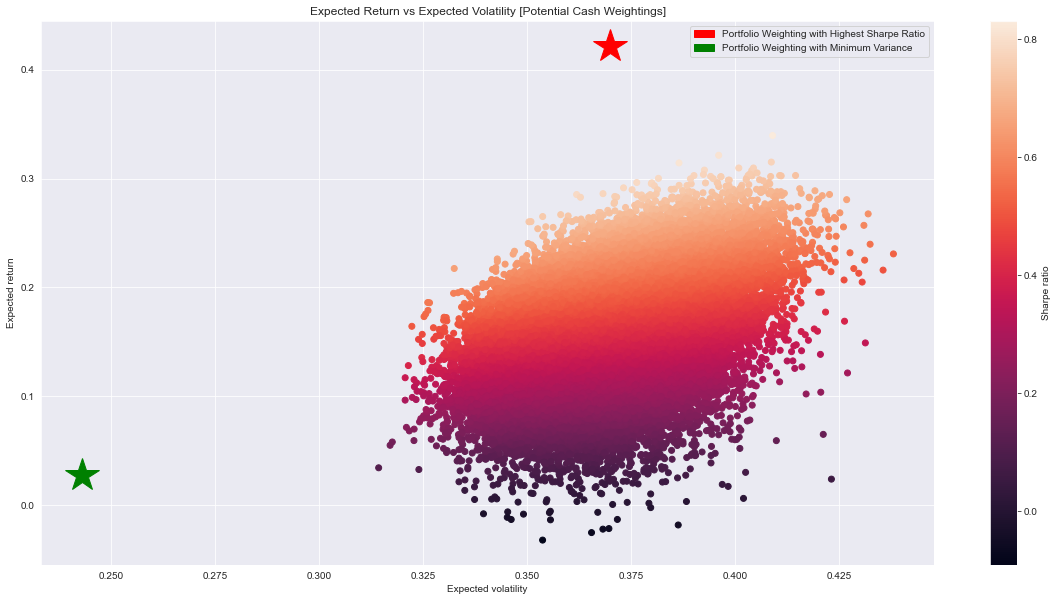

In [26]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'r*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
red = mpatches.Patch(color='r', label='Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='Portfolio Weighting with Minimum Variance')
plt.legend(handles=[red,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential Cash Weightings]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

In [27]:
#Comparing Sharpe Ratios & Volatilites

#Optimal Sharpe ratio portfolio
print("OPTIMAL SHARPE PORTFOLIO: [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]")
print("EXPECTED VOLTAILITY:",opts_Sharpe['x'][1].round(3))
print("EXPECTED RETURN", opts_Sharpe['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_Sharpe['x']).round(3)[2])
print("")

#Minimum variance portfolio
print("MINIMUM VARIANCE PORTFOLIO: [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]")
print("EXPECTED VOLTAILITY:",opts_variance['x'][1].round(3))
print("EXPECTED RETURN", opts_variance['x'][0].round(3))
print("EXPECTED SHARPE RATIO", stats(opts_variance['x']).round(3)[2])
print("")

OPTIMAL SHARPE PORTFOLIO: [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]
EXPECTED VOLTAILITY: 0.0
EXPECTED RETURN 0.087
EXPECTED SHARPE RATIO 1.141

MINIMUM VARIANCE PORTFOLIO: [MP,CLNE,RGLD,POLY.LON,FCX,OXY,NXE,ISO.TRV,ADT1.LON,OSK.TRT,SSRM,MGMLF,BRC.TRV,SIL.TRT,CCO.TRT,BRY,KOS,FNV,FR.TRT,EDR.TRT,WPM]
EXPECTED VOLTAILITY: 0.0
EXPECTED RETURN 0.016
EXPECTED SHARPE RATIO 0.115

